# Import Libraries and Load Data
Load pandas, NumPy, matplotlib, and sklearn modules. Also, import SVC from sklearn.svm, XGBClassifier from xgboost, and KNeighborsClassifier from sklearn.neighbors. Load the pcos_train.csv and pcos_test.csv datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load the training and testing datasets
train_df = pd.read_csv('./data/pcos_train.csv')
test_df = pd.read_csv('./data/pcos_test.csv')

# Split the data into features and target variable
X_train = train_df.drop(columns=['PCOS_diagnosis'])
y_train = train_df['PCOS_diagnosis']
X_test = test_df.drop(columns=['PCOS_diagnosis'])
y_test = test_df['PCOS_diagnosis']

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Preprocess Data & Feature Scaling
Separate features and target variable. Use StandardScaler to scale the features similarly to LR_RF_v3.ipynb.

In [2]:
# Split the data into features and target variable
X_train = train_df.drop(columns=['PCOS_diagnosis'])
y_train = train_df['PCOS_diagnosis']
X_test = test_df.drop(columns=['PCOS_diagnosis'])
y_test = test_df['PCOS_diagnosis']

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM, XGBoost, and KNN Models
Create instances of SVC (with probability=True for ROC), XGBClassifier, and KNeighborsClassifier with default settings.

In [3]:
# Initialize SVM, XGBoost, and KNN Models

# Create instances of the models with default settings
svm_model = SVC(probability=True)  # SVM with probability=True for ROC
xgb_model = XGBClassifier()  # XGBoost Classifier
knn_model = KNeighborsClassifier()  # K-Nearest Neighbors Classifier

# Hyperparameter Tuning with GridSearchCV
Define hyperparameter grids for SVM, XGBoost, and KNN. Use GridSearchCV to tune each model with cross-validation and scoring with 'f1'. Handle potential errors similarly to LR_RF_v3.ipynb.

In [4]:
# Define hyperparameter grids for SVM, XGBoost, and KNN
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0]
}

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform hyperparameter tuning using GridSearchCV
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='f1', error_score='raise')
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='f1', error_score='raise')
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='f1', error_score='raise')

try:
    svm_grid.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"Error during SVM GridSearchCV: {e}")

try:
    xgb_grid.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"Error during XGBoost GridSearchCV: {e}")

try:
    knn_grid.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"Error during KNN GridSearchCV: {e}")

# Get the best models and hyperparameters if no errors occurred
if svm_grid.best_estimator_:
    best_svm = svm_grid.best_estimator_
    best_svm_params = svm_grid.best_params_
    print(f"Best Hyperparameters for SVM: {best_svm_params}")

if xgb_grid.best_estimator_:
    best_xgb = xgb_grid.best_estimator_
    best_xgb_params = xgb_grid.best_params_
    print(f"Best Hyperparameters for XGBoost: {best_xgb_params}")

if knn_grid.best_estimator_:
    best_knn = knn_grid.best_estimator_
    best_knn_params = knn_grid.best_params_
    print(f"Best Hyperparameters for KNN: {best_knn_params}")

Best Hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


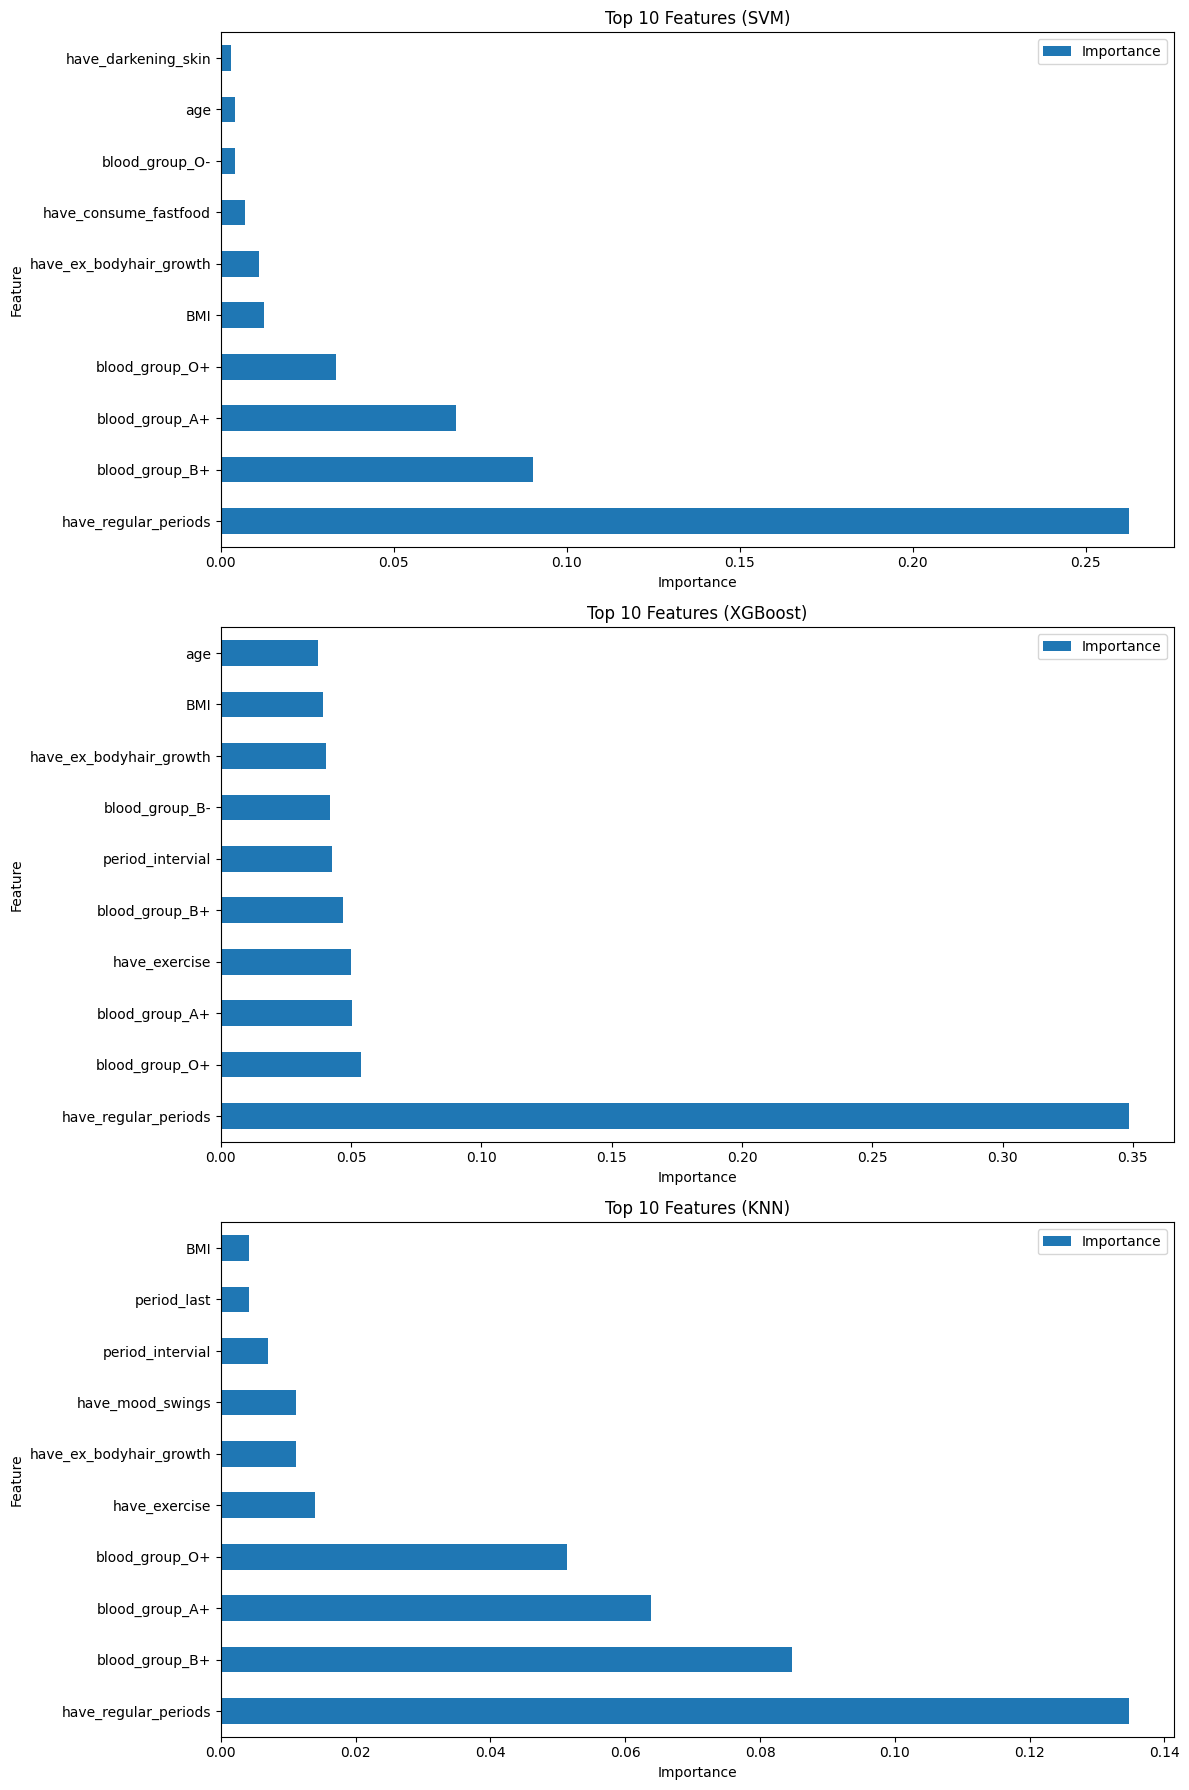

Top 5 features for SVM:
                Feature  Importance
0  have_regular_periods    0.262500
1        blood_group_B+    0.090278
2        blood_group_A+    0.068056
3        blood_group_O+    0.033333
4                   BMI    0.012500

Top 5 features for XGBoost:
                Feature  Importance
0  have_regular_periods    0.348464
1        blood_group_O+    0.053693
2        blood_group_A+    0.050158
3         have_exercise    0.049805
4        blood_group_B+    0.046776

Top 5 features for KNN:
                Feature  Importance
0  have_regular_periods    0.134722
1        blood_group_B+    0.084722
2        blood_group_A+    0.063889
3        blood_group_O+    0.051389
4         have_exercise    0.013889

Common important features in top 5 of all models:
{'have_regular_periods', 'blood_group_O+', 'blood_group_B+', 'blood_group_A+'}


In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Create DataFrames to hold feature importances for easier manipulation
fi_svm = pd.DataFrame(list(feature_importance_svm.items()), columns=['Feature', 'Importance'])
fi_xgb = pd.DataFrame(list(feature_importance_xgb.items()), columns=['Feature', 'Importance'])
fi_knn = pd.DataFrame(list(feature_importance_knn.items()), columns=['Feature', 'Importance'])

# Sort by importance
fi_svm = fi_svm.sort_values('Importance', ascending=False).reset_index(drop=True)
fi_xgb = fi_xgb.sort_values('Importance', ascending=False).reset_index(drop=True)
fi_knn = fi_knn.sort_values('Importance', ascending=False).reset_index(drop=True)

# Plot the top 10 features for each model
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# SVM
fi_svm.head(10).plot.barh(x='Feature', y='Importance', ax=axes[0])
axes[0].set_title('Top 10 Features (SVM)')
axes[0].set_xlabel('Importance')

# XGBoost
fi_xgb.head(10).plot.barh(x='Feature', y='Importance', ax=axes[1])
axes[1].set_title('Top 10 Features (XGBoost)')
axes[1].set_xlabel('Importance')

# KNN
fi_knn.head(10).plot.barh(x='Feature', y='Importance', ax=axes[2])
axes[2].set_title('Top 10 Features (KNN)')
axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

# Print the top 5 features for each model
print("Top 5 features for SVM:")
print(fi_svm.head(5))
print("\nTop 5 features for XGBoost:")
print(fi_xgb.head(5))
print("\nTop 5 features for KNN:")
print(fi_knn.head(5))

# Identify common important features across all three models
print("\nCommon important features in top 5 of all models:")
common_features = set(fi_svm.head(5)['Feature']) & set(fi_xgb.head(5)['Feature']) & set(fi_knn.head(5)['Feature'])
print(common_features)

In [5]:
from sklearn.inspection import permutation_importance

# Use the original feature names from X_test DataFrame
feature_names = X_test.columns

# SVM Feature Importance
print("SVM Feature Importance:")
if hasattr(best_svm, 'coef_'):
    # For linear kernel SVM, use absolute coefficients
    svm_importances = np.abs(best_svm.coef_[0])
    feature_importance_svm = dict(zip(feature_names, svm_importances))
    print(feature_importance_svm)
else:
    # Use permutation importance if coef_ is not available
    svm_perm = permutation_importance(best_svm, X_test_scaled, y_test,
                                        n_repeats=10, random_state=42, scoring='accuracy')
    feature_importance_svm = dict(zip(feature_names, svm_perm.importances_mean))
    print(feature_importance_svm)

# XGBoost Feature Importance
print("\nXGBoost Feature Importance:")
if hasattr(best_xgb, 'feature_importances_'):
    feature_importance_xgb = dict(zip(feature_names, best_xgb.feature_importances_))
    print(feature_importance_xgb)
else:
    print("XGBoost does not provide feature importance.")

# KNN Feature Importance via Permutation Importance
print("\nKNN Feature Importance (Permutation Importance):")
knn_perm = permutation_importance(best_knn, X_test_scaled, y_test,
                                  n_repeats=10, random_state=42, scoring='accuracy')
feature_importance_knn = dict(zip(feature_names, knn_perm.importances_mean))
print(feature_importance_knn)

SVM Feature Importance:
{'age': np.float64(0.004166666666666629), 'period_intervial': np.float64(0.0), 'have_weight_gain': np.float64(-0.00277777777777779), 'have_ex_bodyhair_growth': np.float64(0.011111111111111082), 'have_darkening_skin': np.float64(0.002777777777777746), 'have_hair_loss': np.float64(0.0), 'have_pimples': np.float64(-0.00277777777777779), 'have_consume_fastfood': np.float64(0.00694444444444442), 'have_exercise': np.float64(-0.0013888888888889284), 'have_mood_swings': np.float64(-1.1102230246251566e-17), 'have_regular_periods': np.float64(0.2624999999999999), 'period_last': np.float64(-0.011111111111111127), 'blood_group_A+': np.float64(0.06805555555555551), 'blood_group_A-': np.float64(0.0), 'blood_group_B+': np.float64(0.09027777777777773), 'blood_group_B-': np.float64(0.0), 'blood_group_O+': np.float64(0.033333333333333305), 'blood_group_O-': np.float64(0.004166666666666652), 'BMI': np.float64(0.012499999999999978)}

XGBoost Feature Importance:
{'age': np.float32(0

# Model Evaluation on Test Data
Predict on the test set using the best models from GridSearchCV. Calculate performance metrics such as accuracy and f1_score. Print confusion matrices for each model.

SVM - F1 Score: 0.9210526315789473, Accuracy: 0.9166666666666666
XGBoost - F1 Score: 0.8648648648648649, Accuracy: 0.8611111111111112
KNN - F1 Score: 0.9315068493150684, Accuracy: 0.9305555555555556
Confusion Matrix for SVM:
[[31  5]
 [ 1 35]]
Confusion Matrix for XGBoost:
[[30  6]
 [ 4 32]]
Confusion Matrix for KNN:
[[33  3]
 [ 2 34]]


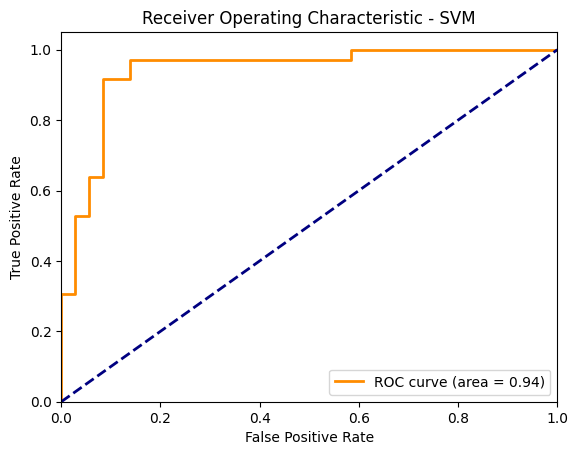

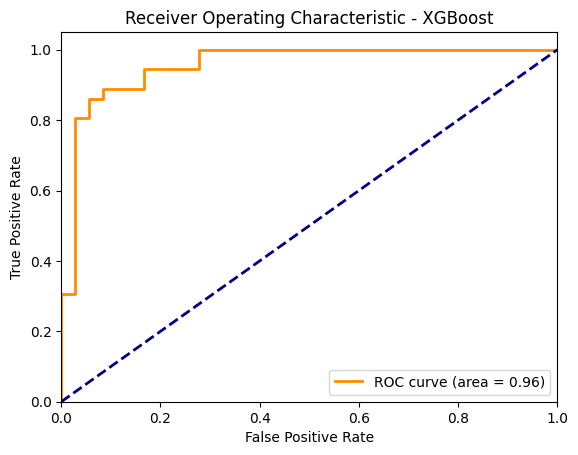

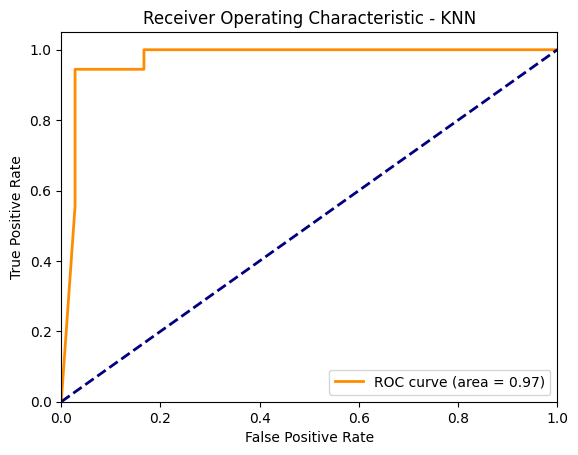

In [6]:
# Model Evaluation on Test Data

# Predict on the test set using the best models from GridSearchCV
y_pred_svm = best_svm.predict(X_test_scaled)
y_pred_xgb = best_xgb.predict(X_test_scaled)
y_pred_knn = best_knn.predict(X_test_scaled)

# Calculate performance metrics such as accuracy and f1_score
svm_f1 = f1_score(y_test, y_pred_svm)
xgb_f1 = f1_score(y_test, y_pred_xgb)
knn_f1 = f1_score(y_test, y_pred_knn)

svm_acc = accuracy_score(y_test, y_pred_svm)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
knn_acc = accuracy_score(y_test, y_pred_knn)

print(f"SVM - F1 Score: {svm_f1}, Accuracy: {svm_acc}")
print(f"XGBoost - F1 Score: {xgb_f1}, Accuracy: {xgb_acc}")
print(f"KNN - F1 Score: {knn_f1}, Accuracy: {knn_acc}")

# Print confusion matrices for each model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

print("Confusion Matrix for XGBoost:")
print(conf_matrix_xgb)

print("Confusion Matrix for KNN:")
print(conf_matrix_knn)

# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb.predict_proba(X_test_scaled)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

# Plot ROC Curves
Generate ROC curves and calculate AUC for SVM, XGBoost, and KNN. Use matplotlib to plot the ROC curves.

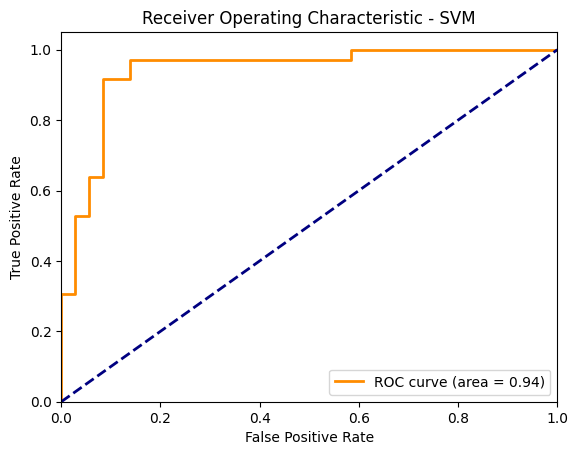

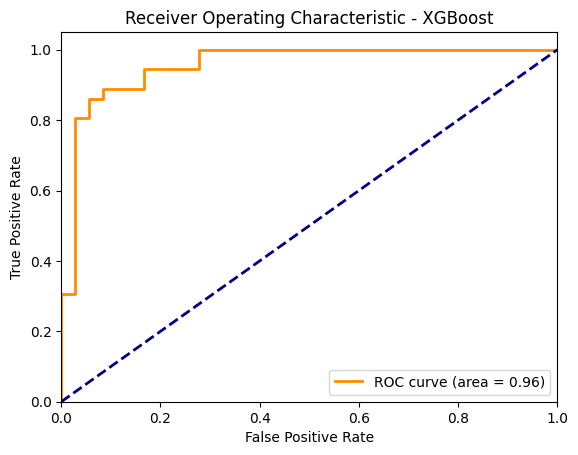

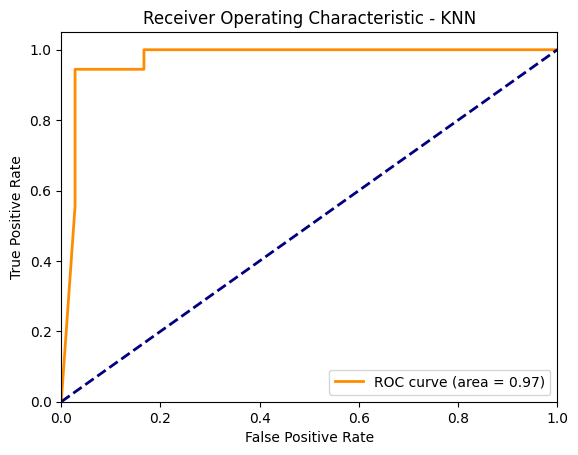

In [7]:
# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb.predict_proba(X_test_scaled)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

# Plot Learning Curves
Plot learning curves for each model using the learning_curve function. Show training and cross-validation scores against the number of training examples (or epochs where applicable).

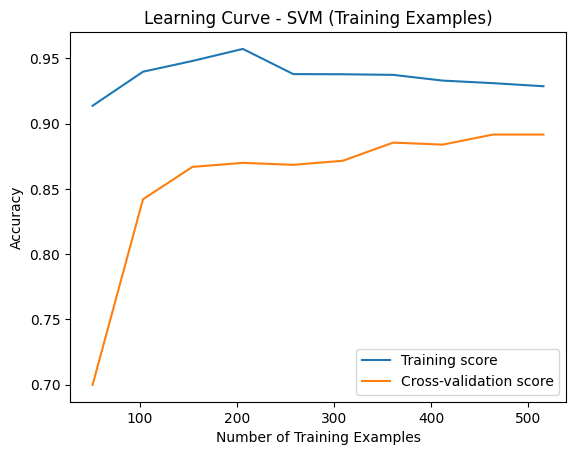

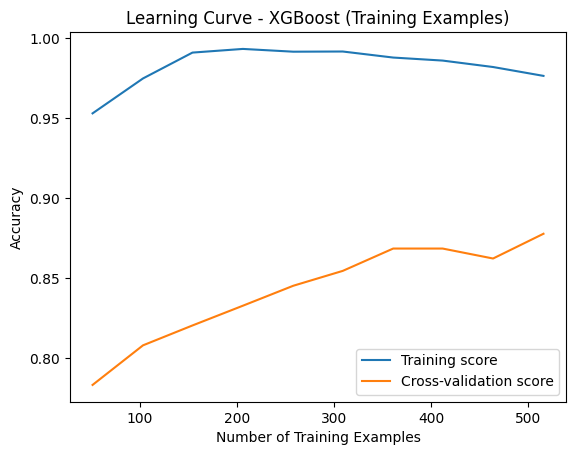

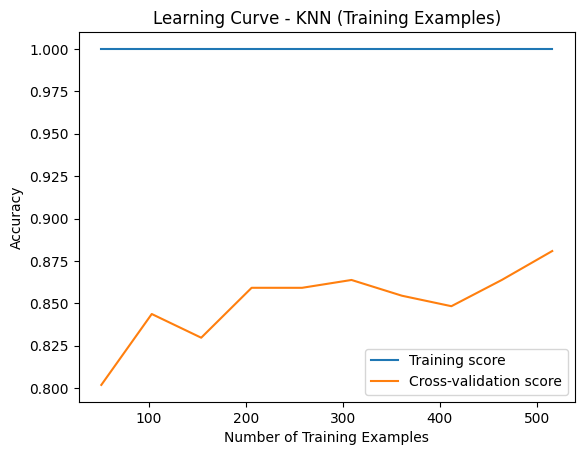

In [8]:
# Plot Learning Curves

# Learning Curve for SVM
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean_svm = train_scores_svm.mean(axis=1)
test_scores_mean_svm = test_scores_svm.mean(axis=1)

plt.figure()
plt.plot(train_sizes_svm, train_scores_mean_svm, label='Training score')
plt.plot(train_sizes_svm, test_scores_mean_svm, label='Cross-validation score')
plt.title('Learning Curve - SVM (Training Examples)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Learning Curve for XGBoost
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(
    best_xgb, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean_xgb = train_scores_xgb.mean(axis=1)
test_scores_mean_xgb = test_scores_xgb.mean(axis=1)

plt.figure()
plt.plot(train_sizes_xgb, train_scores_mean_xgb, label='Training score')
plt.plot(train_sizes_xgb, test_scores_mean_xgb, label='Cross-validation score')
plt.title('Learning Curve - XGBoost (Training Examples)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Learning Curve for KNN
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    best_knn, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean_knn = train_scores_knn.mean(axis=1)
test_scores_mean_knn = test_scores_knn.mean(axis=1)

plt.figure()
plt.plot(train_sizes_knn, train_scores_mean_knn, label='Training score')
plt.plot(train_sizes_knn, test_scores_mean_knn, label='Cross-validation score')
plt.title('Learning Curve - KNN (Training Examples)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()